In [54]:
from keras.preprocessing import image
from keras.applications.vgg16 import vgg16
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import decode_predictions
import numpy as np
import os
from scipy.spatial import distance
from keras.models import Model
from keras.applications import resnet50
import cv2
from random import shuffle

import keras.backend as K

In [ ]:
import os

counter = 0
root = 'C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\data'
data = []
data_paths = []
# os.chdir(root)
for jpg in os.listdir(root):
    print(jpg)
    path = root+"\\"+jpg
    data_paths.append(path)
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    data.append(x)
    
print(len(data))
print(len(data_paths))

(224, 224, 3)


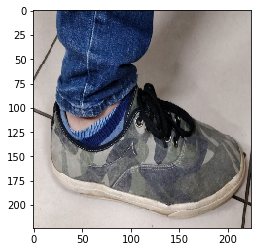

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib inline

print(data[0].shape)
plt.imshow(data[5]/255)

In [57]:
# Resnet
from keras.layers import BatchNormalization

def l2Norm(x):
    return  K.l2_normalize(x, axis=-1)

resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')

print("Model Loaded")


Model Loaded


In [ ]:
net = resnet_model.output
# net = Lambda(l2Norm, output_shape=[2048])(net)
model = Model(inputs=resnet_model.input, outputs=net)
# x = BatchNormalization()(x)
# model = Model(inputs=resnet_model.input, outputs=x)
print("Model Loaded")
img = np.expand_dims(data[0], axis=0)
img = resnet50.preprocess_input(img)
vec = model.predict(img)
features_vec=vec
for i in range(1,len(data)):
#     print(i)
    img = np.expand_dims(data[i], axis=0)
    img = resnet50.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = model.predict(img)
    print(vec)
    features_vec = np.vstack((features_vec,vec))
#     features_vec.append(vec[0])
print(features_vec.shape)
print(features_vec[0].shape)

In [ ]:
net = BatchNormalization()(net)
model = Model(inputs=resnet_model.input, outputs=net)
# model = Model(inputs=resnet_model.input, outputs=x)
print("Model Loaded")
img = np.expand_dims(data[0], axis=0)
img = resnet50.preprocess_input(img)
vec = model.predict(img)
features_vec_norm=vec
for i in range(1,len(data)):
#     print(i)
    img = np.expand_dims(data[i], axis=0)
    img = resnet50.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = model.predict(img)
    print(vec)
    features_vec_norm = np.vstack((features_vec_res,vec))
#     features_vec.append(vec[0])
print(features_vec.shape)
print(features_vec[0].shape)

In [ ]:
img = np.expand_dims(data[0], axis=0)
img = resnet50.preprocess_input(img)
vec = resnet_model.predict(img)
features_vec_res=vec
for i in range(1,len(data)):
#     print(i)
    img = np.expand_dims(data[i], axis=0)
    img = resnet50.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = resnet_model.predict(img)
    print(vec)
    features_vec_res = np.vstack((features_vec_res,vec))
#     features_vec.append(vec[0])
print(features_vec.shape)
print(features_vec[0].shape)

In [52]:
from sklearn import preprocessing

features_vec_norm = preprocessing.normalize(features_vec)
print(features_vec_norm)

[[ 0.00195469  0.01023976  0.00038713 ...,  0.02068381  0.          0.00393078]
 [ 0.00048685  0.00352443  0.00215101 ...,  0.03529224  0.00071474  0.        ]
 [ 0.0017025   0.00467613  0.00444403 ...,  0.02256886  0.01096968
   0.00479461]
 ..., 
 [ 0.00683678  0.00665197  0.01465644 ...,  0.03927069  0.00324068  0.        ]
 [ 0.01084042  0.00216435  0.01605793 ...,  0.01932771  0.01125131
   0.01322886]
 [ 0.00130737  0.02443619  0.00056839 ...,  0.01207243  0.01554693
   0.00216108]]


In [9]:
print(features_vec[2])
print(features_vec[3])

[ 0.51665777  0.51019788  0.01098784 ...,  0.01634336  0.87866169
  0.17456988]
[ 0.41171834  0.81753683  0.         ...,  0.23200361  0.22551206
  0.00479196]


In [35]:
from sklearn.cluster import KMeans

clusters=5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(features_vec_norm)
labels=kmeans.labels_
print("Clustering done.")
from shutil import copyfile
from shutil import rmtree
path = "C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\"
for i in range(clusters):
    newpath = path + str(i)
    if os.path.exists(newpath):
        rmtree(newpath)
    os.makedirs(newpath,777)
        
for i in range(len(labels)):
    copyfile(data_paths[i], path+str(labels[i])+"\\"+data_paths[i].split('\\')[-1])

Clustering done.


In [ ]:
class IdentityMetadata():
    def __init__(self, base, file):
        # dataset base directory
        self.base = base
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.file) 


def load_metadata(path):
    metadata = []
    for f in os.listdir(path):
        print(f)
#         print(os.path.join(path, f))
        metadata.append(path+"\\"+f)        
    return np.array(metadata)
metadata = load_metadata("C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\data")
print(metadata)
print(len(metadata))

0.777
0.711


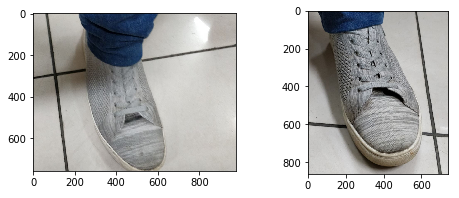

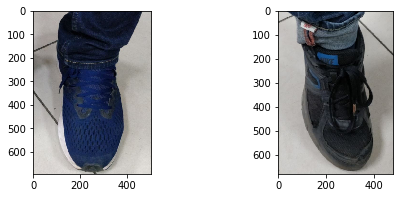

In [99]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib inline


from scipy.spatial import distance

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]


def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    print(round(distance.euclidean(features_vec_norm[idx1],features_vec_norm[idx2]),3))
#     plt.suptitle(f'Distance = {distance(features_vec[idx1], features_vec[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1]))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2]));    

show_pair(0, 61)
show_pair(3, 24)

In [ ]:
l = len(data)
sim_mat = np.empty((l,l))
for i in range(l):
    for j in range(l):
        sim = round(distance.euclidean(features_vec_norm[i],features_vec_norm[j]),3)
        sim_mat[i][j] = sim
        if sim > 0.7:
            print("i : ",i)
            print("j : ",j)

[(0, 'cat_1'), (1, 'cat_2'), (2, 'cat_3'), (3, 'cat_4'), (4, 'cat_5')]


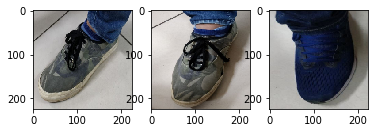

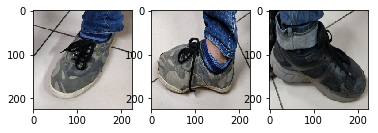

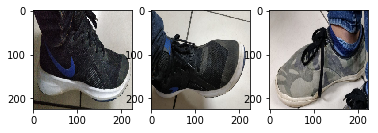

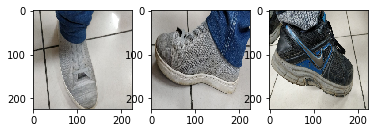

(4, 224, 224, 3)
(4, 224, 224, 3)
(4, 224, 224, 3)


In [124]:
import os
import cv2
import random
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

%matplotlib inline

path = "C:\\Users\\Abhishek\\Desktop\\POC\\images"
dir=os.listdir(path)
# print(dir)
inverse_dir=[(x,y) for (x,y) in enumerate(dir)]
print(inverse_dir)
tot_dir = len(inverse_dir)
# print(tot_dir)
a_batch=[]
p_batch=[]
n_batch=[]
batch_size=4
for i in range(batch_size):
    anchor_dict = np.random.randint(tot_dir,size=1)[0]
#     print(anchor_dict)
    anchor_dict_path = path+"\\"+dir[anchor_dict]
    anchor_dict_files = os.listdir(anchor_dict_path)
    a = anchor_dict_path+"\\"+random.choice(anchor_dict_files)
    img = image.load_img(a, target_size=(224, 224))
    a_img = image.img_to_array(img)
#     a_img = resnet50.preprocess_input(image.img_to_array(img))    
    a_batch.append(a_img)
    p = anchor_dict_path+"\\"+random.choice(anchor_dict_files)
    img = image.load_img(p, target_size=(224, 224))
    p_img = image.img_to_array(img)
#     p_img = resnet50.preprocess_input(image.img_to_array(img)) 
    p_batch.append(p_img)
    n_dict = choice([i for i in range(0,tot_dir) if i not in [anchor_dict]])
#     print(n_dict)
    n_dict_path = path+"\\"+dir[n_dict]
    n_dict_files = os.listdir(n_dict_path)
    n = n_dict_path+"\\"+random.choice(n_dict_files)
    img = image.load_img(n, target_size=(224, 224))
    n_img = image.img_to_array(img)
#     n_img = resnet50.preprocess_input(image.img_to_array(img)) 
    n_batch.append(n_img)
    plt.subplot(131)
    plt.imshow(a_img/255)
    plt.subplot(132)
    plt.imshow(p_img/255)
    plt.subplot(133)
    plt.imshow(n_img/255);
    plt.show()
    
    
a_batch = np.array(a_batch)
print(a_batch.shape)
p_batch = np.array(p_batch)
print(p_batch.shape)
n_batch = np.array(n_batch)
print(n_batch.shape)

In [74]:
import os
import cv2
import random
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

%matplotlib inline

def triplet_generator():
    path = "C:\\Users\\Abhishek\\Desktop\\POC\\images"
    dir=os.listdir(path)
    # print(dir)
    inverse_dir=[(x,y) for (x,y) in enumerate(dir)]
#     print(inverse_dir)
    tot_dir = len(inverse_dir)
    # print(tot_dir)    
    while True:
        a_batch=[]
        p_batch=[]
        n_batch=[]
        batch_size=4
#         print("A")
        for i in range(batch_size):
            anchor_dict = np.random.randint(tot_dir,size=1)[0]
        #     print(anchor_dict)
            anchor_dict_path = path+"\\"+dir[anchor_dict]
            anchor_dict_files = os.listdir(anchor_dict_path)
            a = anchor_dict_path+"\\"+random.choice(anchor_dict_files)
            img = image.load_img(a, target_size=(224, 224))
            a_img = image.img_to_array(img)
            a_img = resnet50.preprocess_input(image.img_to_array(img))    
            a_batch.append(a_img)
            p = anchor_dict_path+"\\"+random.choice(anchor_dict_files)
            img = image.load_img(p, target_size=(224, 224))
            p_img = image.img_to_array(img)
            p_img = resnet50.preprocess_input(image.img_to_array(img)) 
            p_batch.append(p_img)
            n_dict = choice([i for i in range(0,tot_dir) if i not in [anchor_dict]])
        #     print(n_dict)
            n_dict_path = path+"\\"+dir[n_dict]
            n_dict_files = os.listdir(n_dict_path)
            n = n_dict_path+"\\"+random.choice(n_dict_files)
            img = image.load_img(n, target_size=(224, 224))
            n_img = image.img_to_array(img)
            n_img = resnet50.preprocess_input(image.img_to_array(img)) 
            n_batch.append(n_img)
#             plt.subplot(131)
#             plt.imshow(a_img/255)
#             plt.subplot(132)
#             plt.imshow(p_img/255)
#             plt.subplot(133)
#             plt.imshow(n_img/255);
#             plt.show()
        a_batch = np.array(a_batch)
#         print(a_batch.shape)
        p_batch = np.array(p_batch)
#         print(p_batch.shape)
        n_batch = np.array(n_batch)
#         print(n_batch.shape)
        yield [a_batch , p_batch, n_batch], None

In [ ]:
generator = triplet_generator()
for x in generator:
    print(len(x[0]))

In [60]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(224, 224, 3))
in_p = Input(shape=(224, 224, 3))
in_n = Input(shape=(224, 224, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = resnet_model(in_a)
emb_p = resnet_model(in_p)
emb_n = resnet_model(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.3, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

print(nn4_small2_train.summary)

<bound method Network.summary of <keras.engine.training.Model object at 0x000001A328FED588>>


In [76]:
print(nn4_small2_train.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                (None, 2048)         23587712    input_23[0][0]                   
                                                                 input_24[0][0]                   
          

In [75]:
generator = triplet_generator()
nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit_generator(generator, epochs=15, steps_per_epoch=100)

Epoch 1/15
100/100 [==============================] - 3325s 33s/step - loss: 93.9477
Epoch 2/15
100/100 [==============================] - 3150s 31s/step - loss: 3.5073
Epoch 3/15
100/100 [==============================] - 3132s 31s/step - loss: 1.1303
Epoch 4/15
100/100 [==============================] - 3098s 31s/step - loss: 0.2441
Epoch 5/15
100/100 [==============================] - 3162s 32s/step - loss: 0.2716
Epoch 6/15
100/100 [==============================] - 3694s 37s/step - loss: 0.1879
Epoch 7/15
100/100 [==============================] - 4867s 49s/step - loss: 0.1078
Epoch 8/15
100/100 [==============================] - 3795s 38s/step - loss: 0.2265
Epoch 9/15
100/100 [==============================] - 4264s 43s/step - loss: 0.2704
Epoch 10/15
100/100 [==============================] - 4507s 45s/step - loss: 0.2549
Epoch 11/15
100/100 [==============================] - 4550s 45s/step - loss: 0.0512
Epoch 12/15
100/100 [==============================] - 4446s 44s/step - l

In [83]:
intermediate_layer_model = Model(inputs=nn4_small2_train.get_layer("resnet50").get_input_at(0),
                                 outputs=nn4_small2_train.get_layer("resnet50").get_output_at(0))

In [95]:
img = np.expand_dims(data[0], axis=0)
img = resnet50.preprocess_input(img)
vec = intermediate_layer_model.predict(img)
features_vec_tl=vec
for i in range(1,len(data)):
#     print(i)
    img = np.expand_dims(data[i], axis=0)
    img = resnet50.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = intermediate_layer_model.predict(img)
    print(vec)
    features_vec_tl = np.vstack((features_vec_tl,vec))
#     features_vec.append(vec[0])
print(features_vec_tl.shape)
print(features_vec_tl[0].shape)

[[ 0.05718957  0.00156007  0.00115161 ...,  0.58125359  0.          0.        ]]
[[ 0.07696734  0.          0.         ...,  0.31954956  0.          0.        ]]
[[ 0.07334595  0.          0.         ...,  0.58083516  0.          0.        ]]
[[ 0.20834579  0.          0.         ...,  0.49159992  0.          0.        ]]
[[ 0.21587504  0.          0.         ...,  0.35978228  0.          0.        ]]
[[  1.71278551e-01   5.93187870e-05   0.00000000e+00 ...,   5.21430254e-01
    0.00000000e+00   0.00000000e+00]]
[[ 0.12509911  0.00471808  0.         ...,  0.49691966  0.          0.        ]]
[[ 0.15992531  0.          0.         ...,  0.7084353   0.          0.        ]]
[[ 0.26294184  0.          0.         ...,  0.65975565  0.          0.        ]]
[[ 0.19428633  0.          0.         ...,  0.41794091  0.          0.        ]]
[[ 0.33962175  0.0024949   0.         ...,  0.51637775  0.          0.        ]]
[[ 0.19272867  0.00309814  0.         ...,  0.56187683  0.00184229  0.       

2.823
5.413


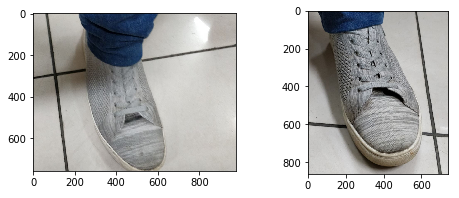

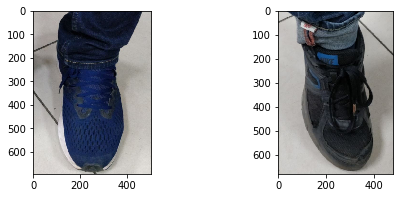

In [97]:

from scipy.spatial import distance

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]


def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    print(round(distance.euclidean(features_vec_tl[idx1],features_vec_tl[idx2]),3))
#     plt.suptitle(f'Distance = {distance(features_vec[idx1], features_vec[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1]))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2]));    

show_pair(0, 61)
show_pair(3, 24)

In [98]:
from sklearn.cluster import KMeans

clusters=5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(features_vec_tl)
labels=kmeans.labels_
print("Clustering done.")
from shutil import copyfile
from shutil import rmtree
path = "C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\"
for i in range(clusters):
    newpath = path + str(i)
    if os.path.exists(newpath):
        rmtree(newpath)
    os.makedirs(newpath,777)
        
for i in range(len(labels)):
    copyfile(data_paths[i], path+str(labels[i])+"\\"+data_paths[i].split('\\')[-1])

Clustering done.
